<a href="https://colab.research.google.com/github/7Without1e/n14250150/blob/main/Tugas_DAE_metode_IQR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Ringkasan Penghapusan Outlier ---
Jumlah data awal: 140
Jumlah data setelah outlier dihapus: 137
Jumlah outlier yang dihapus: 3
Batas bawah untuk penghapusan outlier: 68.25
Batas atas untuk penghapusan outlier: 128.65


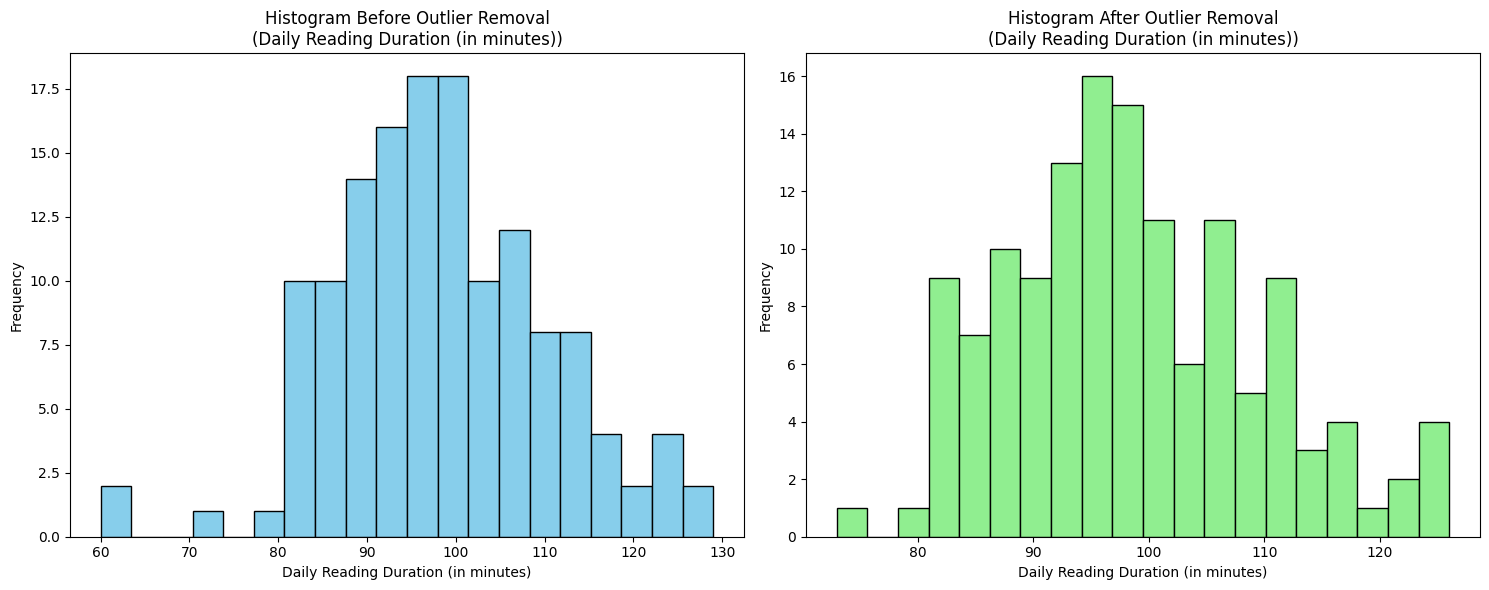

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('TGM 2020-2023_eng.csv', delimiter=';')

# --- Data Cleaning ---
# Columns to be cleaned
cols_to_clean = [
    'Reading Frequency per week',
    'Number of Readings per Quarter',
    'Daily Reading Duration (in minutes)',
    'Internet Access Frequency per Week',
    'Daily Internet Duration (in minutes)',
    'Tingkat Kegemaran Membaca (Reading Interest)'
]

# Replace commas with dots and convert to float
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Outlier Removal using IQR for 'Daily Reading Duration (in minutes)' ---
column_name = 'Daily Reading Duration (in minutes)'

# Calculate Q1, Q3, and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# --- Visualization: Histograms Before and After Outlier Removal ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram before outlier removal
axes[0].hist(df[column_name].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title(f'Histogram Before Outlier Removal\n({column_name})')
axes[0].set_xlabel(column_name)
axes[0].set_ylabel('Frequency')

# Histogram after outlier removal
axes[1].hist(df_cleaned[column_name].dropna(), bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title(f'Histogram After Outlier Removal\n({column_name})')
axes[1].set_xlabel(column_name)
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('daily_reading_duration_histograms.png')

# --- Summary of Outlier Removal ---
initial_count = len(df)
cleaned_count = len(df_cleaned)
outliers_removed = initial_count - cleaned_count

print("--- Ringkasan Penghapusan Outlier ---")
print(f"Jumlah data awal: {initial_count}")
print(f"Jumlah data setelah outlier dihapus: {cleaned_count}")
print(f"Jumlah outlier yang dihapus: {outliers_removed}")
print(f"Batas bawah untuk penghapusan outlier: {lower_bound:.2f}")
print(f"Batas atas untuk penghapusan outlier: {upper_bound:.2f}")

# Save the cleaned dataframe to a new CSV file
df_cleaned.to_csv('TGM 2020-2023_eng_cleaned.csv', index=False)